# Make a full overview of number counts for SPIRE bands



In [1]:
%matplotlib inline


#import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
#plt.rc('figure', figsize=(10, 6))
#from matplotlib_venn import venn3

import herschelhelp 
from herschelhelp.utils import clean_table

from astropy.table import Table, vstack

#import pyvo as vo

from pymoc import MOC

import time

import yaml



import warnings
warnings.filterwarnings('ignore')

In [3]:
fields = yaml.load(open('../../../dmu2/meta_main.yml', 'r'))['fields']

In [9]:
bands = [
    'mips_24',
    'pacs_green', 
    'pacs_red', 
    'spire_250', 
    'spire_350', 
    'spire_500'
]
mag_tables = {}


for band in bands:
    mag_tables[band] = {}
    for f in fields:
      
        mag_tables[band].update({f['name']: None})

In [14]:
cols = ['help_id','field']
cols += ['f_{}'.format(band) for band in bands]
cols += ['ferr_{}'.format(band) for band in bands]

In [15]:
cols

['help_id',
 'field',
 'f_mips_24',
 'f_pacs_green',
 'f_pacs_red',
 'f_spire_250',
 'f_spire_350',
 'f_spire_500',
 'ferr_mips_24',
 'ferr_pacs_green',
 'ferr_pacs_red',
 'ferr_spire_250',
 'ferr_spire_350',
 'ferr_spire_500']

In [16]:
cat = Table.read('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits')[cols]
#cat.write('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits', overwrite=True)

## Plot the histograms

In [33]:
bands_plotting = {
    #'mips_24':['MIPS 24','y'], 
    'pacs_green':['PACS Green','g'], 
    'pacs_red':['PACS red','r'], 
    'spire_250':['SPIRE 250','b'],  
    'spire_350':['SPIRE 350','c'],  
    'spire_500':['SPIRE 500','m'],  

}

In [29]:
areas = {}
for band in bands:
    areas.update({band: {}})
    for n, f in enumerate(fields):
        f = f['name']
        f_moc = MOC(filename='../../../dmu2/dmu2_field_coverages/{}_MOC.fits'.format(f))
    
        #band_moc = MOC(10,
        #    depth_result[~np.isnan(depth_result['ferr_{}_mean'.format(band)])]['hp_idx_o_10']
        #)
        area = f_moc.area_sq_deg #.flattened(order=10)
        areas[band].update({f: area})
        
#np.save('./data/areas.npy', areas) 

In [40]:
total_area = 0.
for f in areas['spire_250']:
    total_area +=areas['spire_250'][f]
total_area

1269.1102950569134

'best'	0
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4
'right'	5
'center left'	6
'center right'	7
'lower center'	8
'upper center'	9
'center'	10

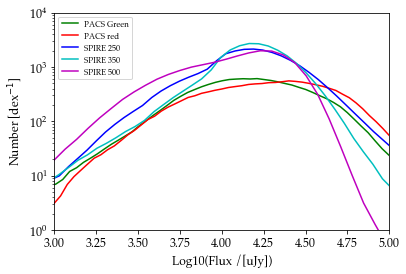

In [49]:
fig, ax = plt.subplots()



area = 5
for band in bands_plotting:
    mask = np.isfinite(np.log10(cat['f_'+band]))
    mags = cat[mask]['f_'+band]
    if not np.sum(mask)==0:
        #vz.hist(table[name][mask], bins='scott', label=label, alpha=.5)
        h = np.histogram(np.log10(mags), bins = 100)
        bin_width = (np.abs(h[1][5] - h[1][4]) )
        #ax.fill_between( h[1][:-1], h[0]/bin_width)#, alpha=0.4)
        ax.plot( h[1][:-1], h[0]/(bin_width*total_area) , c=bands_plotting[band][1],
               label=bands_plotting[band][0])#, alpha=0.4)


ax.legend(loc=0, fontsize=8)

plt.xlim(3.,5.)
plt.xlabel("Log10(Flux /[uJy])")
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1.e0,1.e4)
plt.ylabel('Number [dex$^{-1}$]')

#plt.rc('font', family='serif', serif='Times')
#plt.rc('text') #, usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)


plt.savefig('./figs/numbers_AllSky.pdf', bbox_inches='tight')
plt.savefig('./figs/numbers_AllSky.png', bbox_inches='tight')

In [30]:

#areas = np.load('./data/areas.npy').item()

In [31]:
areas

{'mips_24': {'AKARI-NEP': 9.194732358779467,
  'AKARI-SEP': 8.713306475131118,
  'Bootes': 11.42815299095486,
  'CDFS-SWIRE': 12.971246403717068,
  'COSMOS': 5.083863478496816,
  'EGS': 3.566383275122158,
  'ELAIS-N1': 13.507484555454763,
  'ELAIS-N2': 9.167479903991113,
  'ELAIS-S1': 9.002940646885508,
  'GAMA-09': 62.01393417284915,
  'GAMA-12': 62.70933280772107,
  'GAMA-15': 61.70114565980842,
  'HDF-N': 0.6717832558166041,
  'Herschel-Stripe-82': 363.22747930641884,
  'Lockman-SWIRE': 22.413863402949218,
  'HATLAS-NGP': 177.6981971077162,
  'SA13': 0.27416379328431184,
  'HATLAS-SGP': 294.5684540900642,
  'SPIRE-NEP': 0.1280660469377391,
  'SSDF': 111.11624949343539,
  'xFLS': 7.44043242140754,
  'XMM-13hr': 0.7570240166583633,
  'XMM-LSS': 21.75457939331374},
 'pacs_green': {'AKARI-NEP': 9.194732358779467,
  'AKARI-SEP': 8.713306475131118,
  'Bootes': 11.42815299095486,
  'CDFS-SWIRE': 12.971246403717068,
  'COSMOS': 5.083863478496816,
  'EGS': 3.566383275122158,
  'ELAIS-N1': 13

In [52]:
np.unique(cat['field'])

AKARI-NEP
AKARI-SEP
Bootes
CDFS-SWIRE
COSMOS
EGS
ELAIS-N1
ELAIS-N2
ELAIS-S1
GAMA-09
GAMA-12


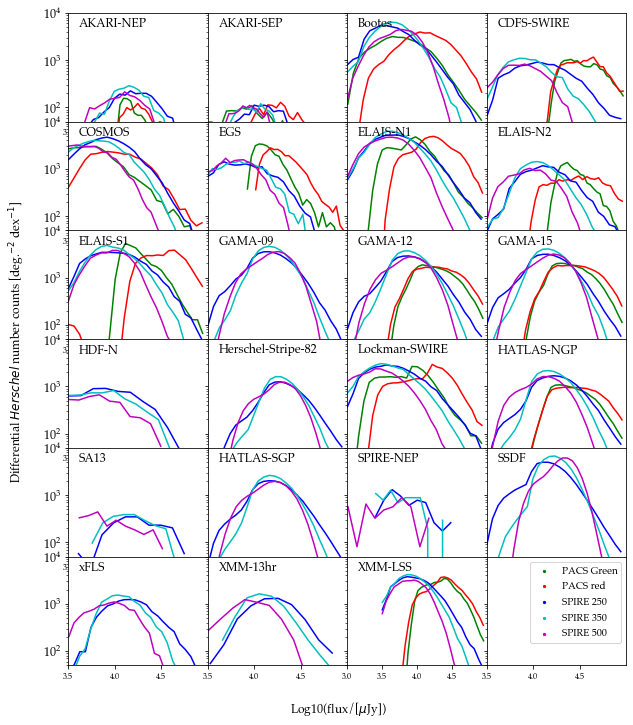

In [68]:
dim = [4,6]
fig, axes = plt.subplots(dim[1], dim[0], sharex=True, sharey=True)
plt.rcParams.update({'font.size': 12})
xlims = [3.5,5]

#area_per_pixel  = MOC(10, (1234)).area_sq_degrees
for n, f in enumerate(fields):
    f = f['name']
        
    x, y = np.floor_divide(n, dim[0]), np.remainder(n, dim[0])
    
   
    
    
    for band in bands_plotting: #[b for b in mag_tables if b.endswith('g')]:
        try:
            #No NaNa
            mask = np.isfinite(np.log10(cat['f_'+band]))
            #S/N>2
            mask &= cat['f_'+band]/cat['ferr_'+band]>1
            #This field
            mask &= cat['field'] == f.replace('HATLAS-NGP', 'NGP').replace('Lockman-SWIRE', 'Lockman SWIRE')
            #remove outside lims
            mask &= np.log10(cat['f_'+band]) >xlims[0]
            mask &= np.log10(cat['f_'+band]) <xlims[1]
            mags = cat[mask]['f_'+band]
            #mask &= (bands[band][0]['field'] == f)

        
            area = areas[band][f]
            #area=f_moc.area_sq_deg
            
            if not np.sum(mask)==0:
                #vz.hist(table[name][mask], bins='scott', label=label, alpha=.5)
                if area<1:
                    bins=10
                else:
                    bins =25
                h = np.histogram(np.log10(mags), bins = bins)
                bin_width = (np.abs(h[1][5] - h[1][4]) )
                #ax.fill_between( h[1][:-1], h[0]/bin_width)#, alpha=0.4)
                axes[x,y].plot( h[1][:-1], h[0]/(bin_width*area), c=bands_plotting[band][1])#, alpha=0.4)
        except:
            print('Failed: {}, {}'.format(band,f))


 
   


    axes[x,y].get_xaxis().set_tick_params(direction='out')
    axes[x,y].xaxis.set_ticks_position('bottom')
    axes[x,y].tick_params(axis='x', labelsize=8)
    axes[x,y].set_xlim(xlims[0], xlims[1])
    axes[x,y].set_xticks([3.5,3,4,4.5])
    axes[x,y].set_ylim(5.e1, 1.e4)
    axes[x,y].set_yscale('log')
    
    axes[x,y].scatter([-99],[-99], 
                      label=f, 
                      c='w', s=0.0001)
    axes[x,y].legend(frameon=False, loc=(-0.2, 0.8)) #, bbox_to_anchor=(0.1, 0.7, 0.2, 0.2)




for band in bands_plotting: #[b for b in mag_tables if b.endswith('g')]:
    axes[dim[1]-1,dim[0]-1].scatter([-99],[-99], 
                      label=bands_plotting[band][0], 
                      c=bands_plotting[band][1], s=5.)
axes[dim[1]-1,dim[0]-1].legend( prop={'size': 10},ncol=1)    
    
axes[dim[1]-1,dim[0]-1].tick_params(axis='x', labelsize=8)
#axes[dim[1]-1,dim[0]-1].set_xlabel('band')
    
fig.text(0.5, 0.07, 'Log10(flux/[$\mu$Jy]) ', ha='center')
fig.text(0.04, 0.5, 'Differential $Herschel$ number counts [deg.$^{-2}$ dex$^{-1}$]', va='center', rotation='vertical')

fig.set_size_inches(10, 12)
fig.subplots_adjust(hspace=0, wspace=0)

plt.rc('axes', labelsize=12)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
#plt.show()
plt.savefig('./figs/numbers_Herschel_allfields.pdf', bbox_inches='tight')
plt.savefig('./figs/numbers_Herschel_allfields.png', bbox_inches='tight')



In [57]:
cat[cat['field']=='EGS']

help_id,field,f_mips_24,f_pacs_green,f_pacs_red,f_spire_250,f_spire_350,f_spire_500,ferr_mips_24,ferr_pacs_green,ferr_pacs_red,ferr_spire_250,ferr_spire_350,ferr_spire_500
,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
bytes33,bytes18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HELP_J141126.956+520044.482,EGS,nan,48728.1796875,38067.671875,24181.548828125,19048.064453125,11767.7216796875,nan,6833.125,14362.365234375,17632.935546875,13535.81640625,7851.8193359375
HELP_J141139.650+520500.259,EGS,nan,20694.798828125,13390.96484375,5007.2138671875,6728.6357421875,5004.47021484375,nan,5880.3515625,6565.0078125,3307.41796875,4599.9501953125,3393.96142578125
HELP_J141142.927+520516.311,EGS,nan,24807.185546875,17112.759765625,5337.85546875,1149.745849609375,1798.6341552734375,nan,5844.853515625,6501.869140625,3678.060546875,851.392333984375,1323.2242431640625
HELP_J141145.233+515932.983,EGS,nan,12818.2578125,27906.572265625,3797.1318359375,4063.462158203125,2845.426025390625,nan,5485.96875,6588.873046875,2726.73583984375,2845.978759765625,1988.0657958984375
HELP_J141149.671+520132.384,EGS,nan,13296.4970703125,16971.837890625,8131.833984375,8620.8564453125,8931.7509765625,nan,6543.5498046875,7976.255859375,5582.216796875,5897.796875,6253.759765625
HELP_J141149.872+520436.171,EGS,nan,11929.3349609375,16119.3369140625,-1032.6405029296875,-2511.820556640625,11197.8720703125,nan,5370.0009765625,6171.2626953125,711.8880615234375,1813.863525390625,7386.8681640625
HELP_J141150.563+520137.114,EGS,nan,26901.08203125,18162.408203125,8528.9326171875,12385.4345703125,511974.4375,nan,8508.1796875,8551.5390625,6053.63623046875,8440.138671875,366335.84375
HELP_J141150.820+520217.366,EGS,nan,16567.427734375,18968.984375,2599.883056640625,3238.1904296875,1485.258056640625,nan,7168.923828125,7068.1328125,1924.093017578125,2125.42333984375,1013.6353759765625


In [66]:
np.sum((cat['field']=='AKAR-SEP' ) & (cat['f_spire_250']/cat['ferr_spire_250']>2))

0